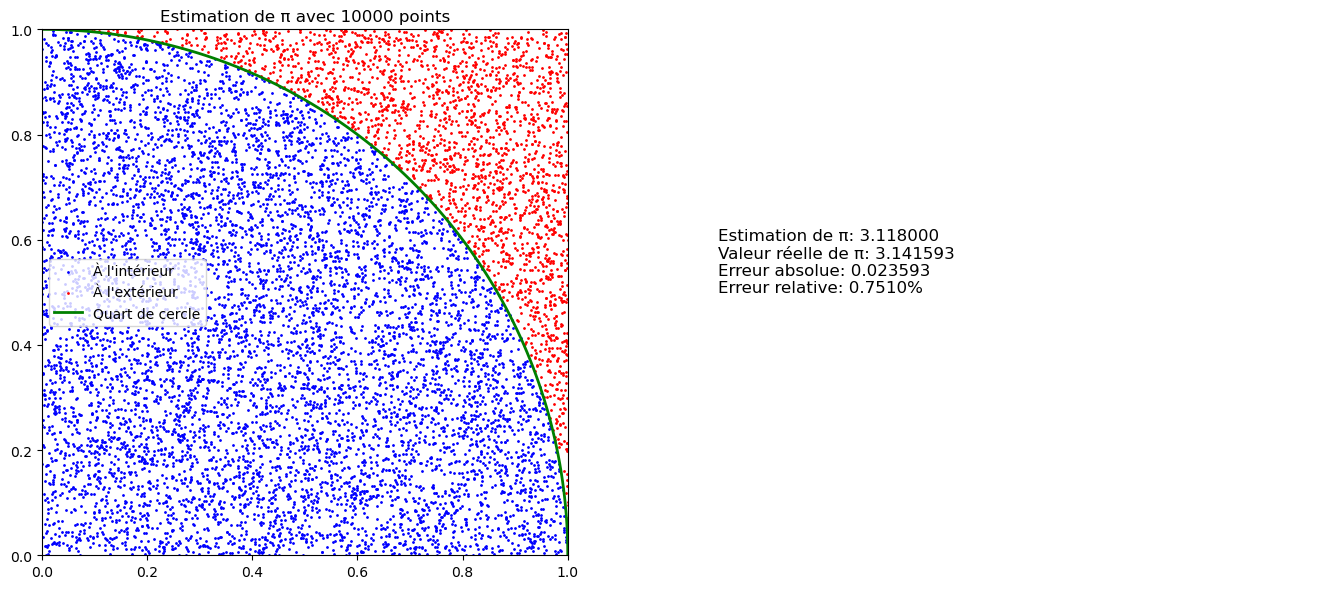

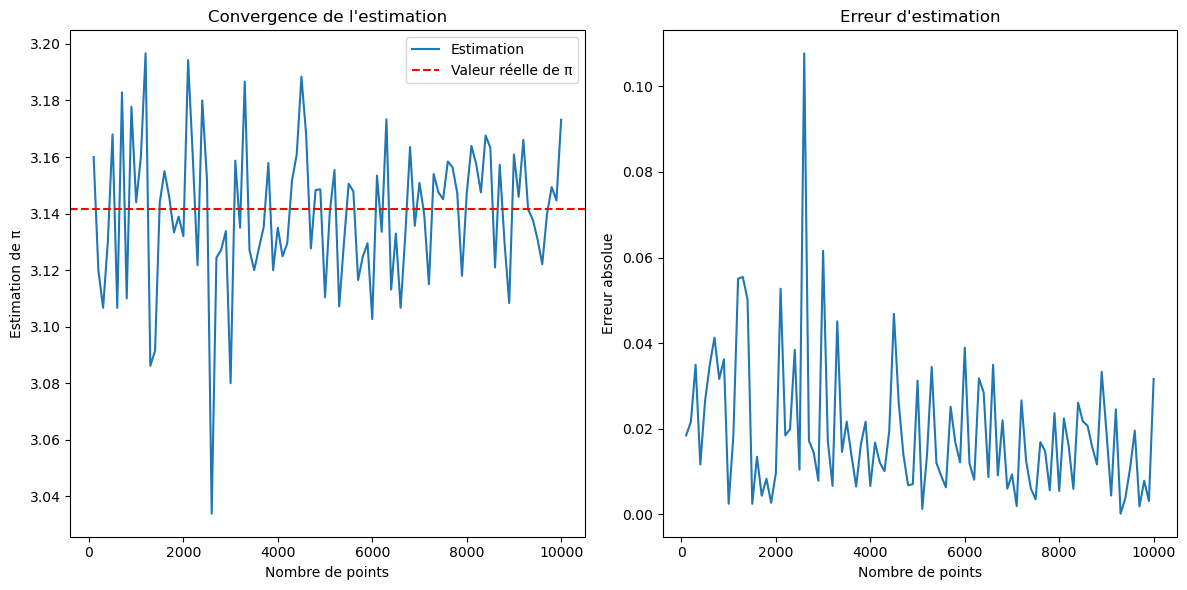

In [29]:
#Exercice2
import numpy as np
import matplotlib.pyplot as plt

def estimate_pi(n):
    """
    Estime π en utilisant n points aléatoires
    Retourne l'estimation de π et les points générés
    """
    # Génération de n points aléatoires dans [0,1]×[0,1]
    points = np.random.rand(n, 2)
    # Calcul des distances à l'origine
    distances = np.sqrt(points[:,0]**2 + points[:,1]**2)
    # Points à l'intérieur du quart de cercle (distance ≤ 1)
    inside = distances <= 1
    pi_estimate = 4 * np.sum(inside) / n
    return pi_estimate, points, inside
def plot_monte_carlo(n):
    """Estime π et affiche les points avec l'erreur d'estimation"""
    pi_estimate, points, inside = estimate_pi(n)
    error = abs(pi_estimate - np.pi)
    # Création de la figure avec deux sous-graphiques
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    # Graphique des points
    ax1.scatter(points[inside, 0], points[inside, 1], color='blue', s=1, label='À l\'intérieur')
    ax1.scatter(points[~inside, 0], points[~inside, 1], color='red', s=1, label='À l\'extérieur')
    # Tracé du quart de cercle
    theta = np.linspace(0, np.pi/2, 100)
    ax1.plot(np.cos(theta), np.sin(theta), color='green', linewidth=2, label='Quart de cercle')
    ax1.set_xlim(0, 1)
    ax1.set_ylim(0, 1)
    ax1.set_aspect('equal')
    ax1.set_title(f'Estimation de π avec {n} points')
    ax1.legend()
    # Affichage des résultats
    ax2.axis('off')
    results = (
        f"Estimation de π: {pi_estimate:.6f}\n"
        f"Valeur réelle de π: {np.pi:.6f}\n"
        f"Erreur absolue: {error:.6f}\n"
        f"Erreur relative: {100*error/np.pi:.4f}%"
    )
    ax2.text(0.1, 0.5, results, fontsize=12)
    plt.tight_layout()
    plt.show()
    return pi_estimate, error
n = 10000
pi_est, err = plot_monte_carlo(n)
def plot_convergence(max_points=10000, step=100):
    """Trace la convergence de l'estimation de π"""
    points_range = range(step, max_points+1, step)
    estimates = []
    errors = []
    for n in points_range:
        pi_estimate, _, _ = estimate_pi(n)
        estimates.append(pi_estimate)
        errors.append(abs(pi_estimate - np.pi))
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(points_range, estimates, label='Estimation')
    plt.axhline(y=np.pi, color='r', linestyle='--', label='Valeur réelle de π')
    plt.xlabel('Nombre de points')
    plt.ylabel('Estimation de π')
    plt.legend()
    plt.title('Convergence de l\'estimation')
    plt.subplot(1, 2, 2)
    plt.plot(points_range, errors)
    plt.xlabel('Nombre de points')
    plt.ylabel('Erreur absolue')
    plt.title('Erreur d\'estimation')
    plt.tight_layout()
    plt.show()
plot_convergence(max_points=10000,step=100)

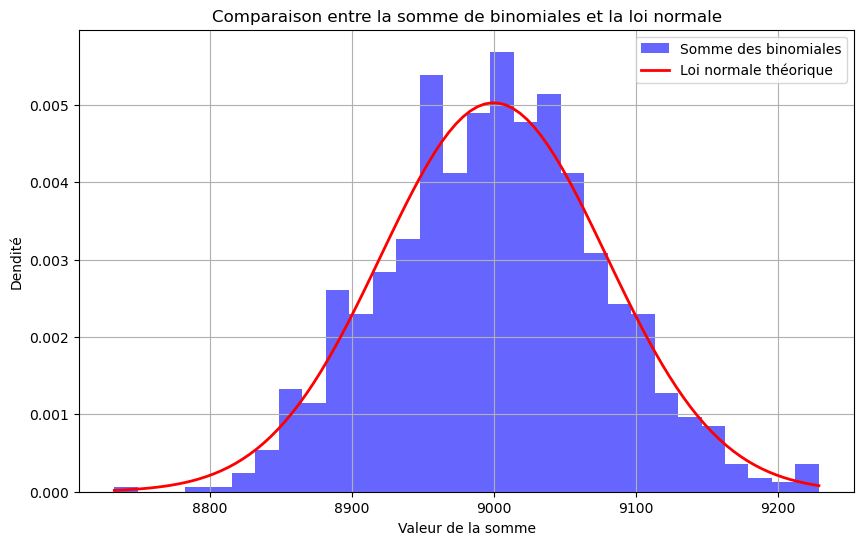

In [2]:
#Exercice4
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, norm
n = 1000
p = 0.3
k = 30
num_sim = 1000
sums = np.sum(np.random.binomial(k, p, size=(num_sim, n)), axis=1)
mean_theo = n*k*p
var_theo = n*k*p*(1-p)
plt.figure(figsize=(10, 6))
count, bins,_=plt.hist(sums,bins=30, density=True, alpha=0.6,color='b', label='Somme des binomiales')
x = np.linspace(min(bins), max(bins), 100)
plt.plot(x, norm.pdf(x, mean_theo,np.sqrt(var_theo)), 'r-',lw=2,label='Loi normale théorique')
plt.title('Comparaison entre la somme de binomiales et la loi normale')
plt.xlabel('Valeur de la somme')
plt.ylabel('Dendité')
plt.legend()
plt.grid(True)
plt.show()

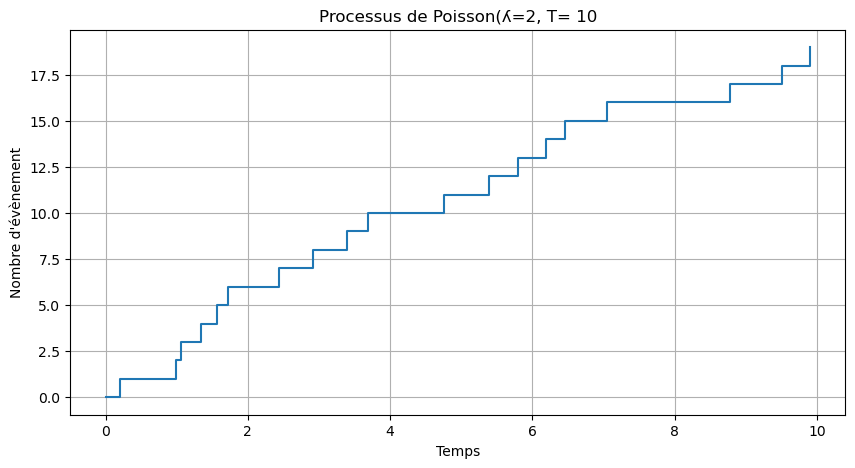

In [27]:
#Exercice6
import numpy as np
import matplotlib.pyplot as plt
def simulate_poisson_process(lambda_param,T):
    "stimule un processus de poisson sur [0,T] avec paramètre lambda Retourne les temps d'arrivée des évènement"
    times = []
    current_time = 0
    while current_time  < T:
        inter_arrival = np . random.exponential(1/lambda_param)
        current_time +=inter_arrival
        if current_time < T:
            times.append(current_time)
    return times
def plot_poisson_process(lambda_param,T):
    "stimule et trace les processus de poisson"
    arrival_times = simulate_poisson_process(lambda_param,T)
    counts = np.arange(1,len(arrival_times)+1)
    plt.figure(figsize=(10,5))
    plt.step([0] + arrival_times, [0]+list(counts), where='post')
    plt.xlabel('Temps')
    plt.ylabel('Nombre d\'évènement')
    plt.title(f'Processus de Poisson(ʎ={lambda_param}, T= {T}')
    plt.grid(True)
    plt.show()
lambda_param = 2
T = 10
plot_poisson_process(lambda_param, T)

In [28]:
#Exercice8
import numpy as np
from collections import Counter
import math
def theoretical_entropy(probabilities):
    """Calcule l'entropie théorique d'une distribution"""
    return -sum(p * math.log2(p) for p in probabilities if p > 0)
def empirical_entropy(samples):
    """Calcule l'entropie empirique à partir d'échantillons"""
    counter = Counter(samples)
    total = len(samples)
    probs = [count/total for count in counter.values()]
    return -sum(p * math.log2(p) for p in probs if p > 0)
def simulate_and_compare_entropy(probabilities, symbols, num_samples=1000):
    """
    Simule une source aléatoire et compare entropie théorique et empirique
    probabilities: liste des probabilités pour chaque symbole
    symbols: liste des symboles correspondants
    """
    # Génération des échantillons
    samples = np.random.choice(symbols, size=num_samples, p=probabilities)
    # Calcul des entropies
    theo_ent = theoretical_entropy(probabilities)
    emp_ent = empirical_entropy(samples)
    # Affichage des résultats
    print(f"Distribution: {dict(zip(symbols, probabilities))}")
    print(f"Entropie théorique: {theo_ent:.4f} bits")
    print(f"Entropie empirique ({num_samples} échantillons): {emp_ent:.4f} bits")
    print(f"Différence: {abs(theo_ent - emp_ent):.4f} bits")
symbols = ['a', 'b', 'c']
probabilities = [0.5, 0.3, 0.2]
simulate_and_compare_entropy(probabilities, symbols, num_samples=10000)

Distribution: {'a': 0.5, 'b': 0.3, 'c': 0.2}
Entropie théorique: 1.4855 bits
Entropie empirique (10000 échantillons): 1.4853 bits
Différence: 0.0002 bits
